# <a id='toc1_'></a>[Machine Learning using Spotify's dataset](#toc0_)

- 🎯 The goal of this project is to create effective Machine Learning models to predict the popularity of songs on Spotify.
- Therefore, the focus will be on developing a supervised classification model to predict whether a song will be popular or not.

**Table of contents**<a id='toc0_'></a>    
- [Machine Learning using Spotify's dataset](#toc1_)    
  - [Exploratory Data Analysis (EDA)](#toc1_1_)    
    - [Importing Packages and Reading the Data](#toc1_1_1_)    
    - [Basic Stats](#toc1_1_2_)    
    - [Histograms (Numerical Columns)](#toc1_1_3_)    
    - [Cardinality (Non-numerical Columns)](#toc1_1_4_)    
    - [Top 10 Most Popular Categories](#toc1_1_5_)    
  - [Preprocessing](#toc1_2_)    
    - [Enrich Data](#toc1_2_1_)    
    - [Columns Removal](#toc1_2_2_)    
    - [Dtypes](#toc1_2_3_)    
    - [Missing Values](#toc1_2_4_)    
    - [Duplicates](#toc1_2_5_)    
    - [Target Variable](#toc1_2_6_)    
    - [Feature Engineering](#toc1_2_7_)    
    - [Normalization](#toc1_2_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

PS: the table of contents will not work in GitHub's renderer.

## <a id='toc1_1_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

### <a id='toc1_1_1_'></a>[Importing Packages and Reading the Data](#toc0_)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
# Reading dataframe
df = pd.read_csv('dataset.csv')

### <a id='toc1_1_2_'></a>[Basic Stats](#toc0_)

In [3]:
# Taking a peek at the dataset
display(df.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
# Checking dtypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# Basic stats of numerical columns
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### <a id='toc1_1_3_'></a>[Histograms (Numerical Columns)](#toc0_)

Text(0.5, 0.98, 'Histogram of the Numerical Features')

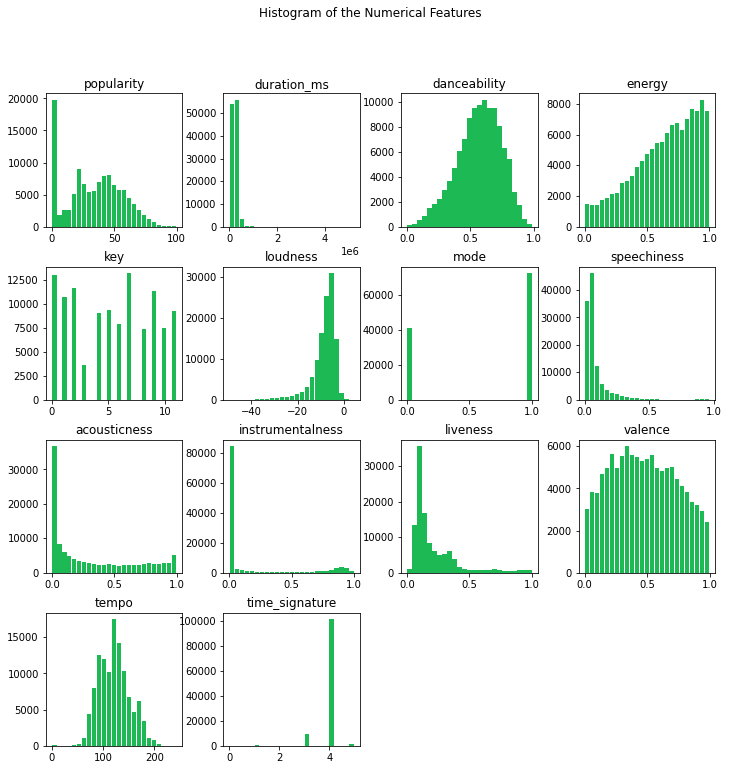

In [6]:
# Checking the histogram of all numerical features
ax = df.loc[:, df.columns != 'Unnamed: 0'].hist(bins=25, grid=False, figsize=(12,12), zorder=2, rwidth=0.9, color="#1DB954")
plt.suptitle("Histogram of the Numerical Features")

### <a id='toc1_1_4_'></a>[Cardinality (Non-numerical Columns)](#toc0_)

In [7]:
# Check the count of distinct values of non-numerical columns
print("---- Count of Distinct Values ----\n")
for col in df.columns:
    if df[col].dtype == 'object':
        distinct_count = df[col].nunique()
        print(f"-> {col}: {distinct_count}")

---- Count of Distinct Values ----

-> track_id: 89741
-> artists: 31437
-> album_name: 46589
-> track_name: 73608
-> track_genre: 114


### <a id='toc1_1_5_'></a>[Top 10 Most Popular Categories](#toc0_)

In [8]:
def top10MostPop(column,title=None):
    calcPopularity = df.groupby(column)['popularity'].mean()
    top10 = calcPopularity.sort_values(ascending=False).head(10)
    sns.barplot(x=top10.values, y=top10.index, orient='h',color="#1DB954")
    if title:
        plt.title(f"{title}")
    plt.ylabel(f"{column}")
    plt.xlabel('Popularity')
    plt.show()
    return

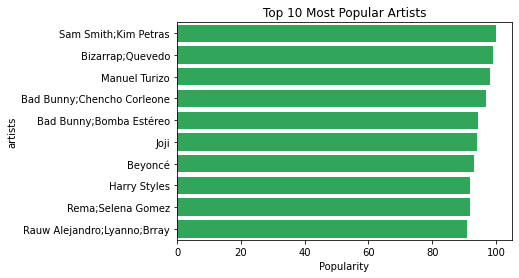

In [9]:
top10MostPop('artists',"Top 10 Most Popular Artists")

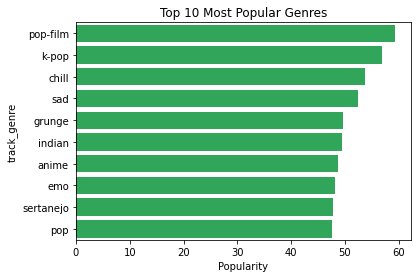

In [10]:
top10MostPop('track_genre',"Top 10 Most Popular Genres")

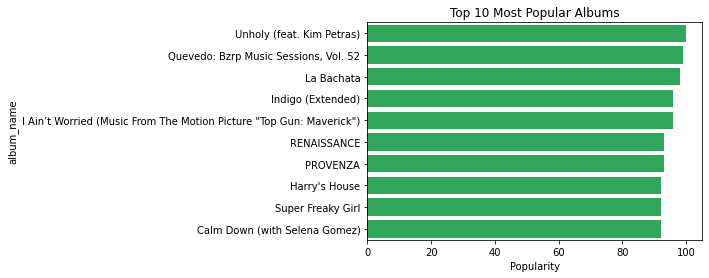

In [11]:
top10MostPop('album_name',"Top 10 Most Popular Albums")

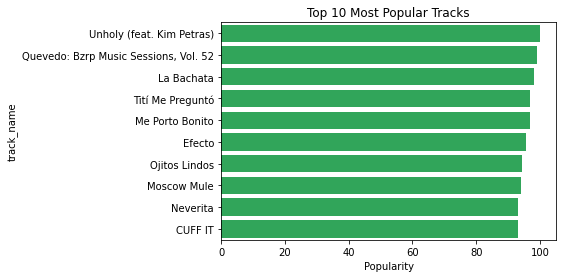

In [12]:
top10MostPop('track_name',"Top 10 Most Popular Tracks")

- Disclaimer: This is a preliminary analysis to guide us in the process of selecting features, and it is not 100% accurate. We are conducting this analysis **before** preprocessing.

## <a id='toc1_2_'></a>[Preprocessing](#toc0_)

### <a id='toc1_2_1_'></a>[Enrich Data](#toc0_)

In [13]:
# Create a column that shows if the song has a featuring or not
df['feat'] = df['artists'].apply(lambda x: 1 if ';' in str(x) else 0)
df[['artists','feat']].head(10)

,artists,feat
0,Gen Hoshino,0
1,Ben Woodward,0
2,Ingrid Michaelson;ZAYN,1
3,Kina Grannis,0
4,Chord Overstreet,0
5,Tyrone Wells,0
6,A Great Big World;Christina Aguilera,1
7,Jason Mraz,0
8,Jason Mraz;Colbie Caillat,1
9,Ross Copperman,0


### <a id='toc1_2_2_'></a>[Columns Removal](#toc0_)

In [14]:
# Deleting columns with high cardinality
df = df.drop(columns = ['Unnamed: 0','track_id','track_name','album_name'])
df.columns

Index(['artists', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'feat'],
      dtype='object')

### <a id='toc1_2_3_'></a>[Dtypes](#toc0_)

In [15]:
# Change 'explicit' to int64 (it is the only boolean in the dataset)
df['explicit'] = df['explicit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   popularity        114000 non-null  int64  
 2   duration_ms       114000 non-null  int64  
 3   explicit          114000 non-null  int64  
 4   danceability      114000 non-null  float64
 5   energy            114000 non-null  float64
 6   key               114000 non-null  int64  
 7   loudness          114000 non-null  float64
 8   mode              114000 non-null  int64  
 9   speechiness       114000 non-null  float64
 10  acousticness      114000 non-null  float64
 11  instrumentalness  114000 non-null  float64
 12  liveness          114000 non-null  float64
 13  valence           114000 non-null  float64
 14  tempo             114000 non-null  float64
 15  time_signature    114000 non-null  int64  
 16  track_genre       11

### <a id='toc1_2_4_'></a>[Missing Values](#toc0_)

In [16]:
# Checking missing values
df.isna().sum()

artists             1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
feat                0
dtype: int64

In [17]:
# Making sure that the missing values are in the same row
df[df.artists.isna()]

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,feat
65900,NaN,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop,0


In [18]:
# Drop this row
df = df.dropna().reset_index(drop=True)
# Check if it worked
df.isna().sum()

artists             0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
feat                0
dtype: int64

### <a id='toc1_2_5_'></a>[Duplicates](#toc0_)

In [19]:
# Checking duplicated
df.duplicated().sum()

7082

In [20]:
# Drop these values
df = df.drop_duplicates().reset_index(drop=True)
# Check if it worked
df.duplicated().sum()

0

### <a id='toc1_2_6_'></a>[Target Variable](#toc0_)

- In this project, our target variable is popularity. Since we are building a supervised classification model, we need to change popularity which is a number based on the total number of plays the track has had and how recent those plays are.
If you want to know whether a song will be popular or not, you will need to establish a **popularity threshold**. For example, you could define that all songs with a popularity above 70 are considered popular and those below 70 are considered non-popular. This threshold is not standard and can be adjusted to test different scenarios.

In [21]:
df['target'] = df['popularity'].apply(lambda x: 1 if x>70 else 0)
df[['popularity','target']].head(10)

,popularity,target
0,73,1
1,55,0
2,57,0
3,71,1
4,82,1
5,58,0
6,74,1
7,80,1
8,74,1
9,56,0


### <a id='toc1_2_7_'></a>[Feature Engineering](#toc0_)

- We still have two categorical columns, namely "artists" and "track_genre". In order to use these columns in our analysis, we will compute the average popularity for each category. The categories will then be replaced by their respective mean popularity value. If the mean popularity value is above 70, the category will be assigned a value of 1 to indicate that it is a popular genre or artist.

In [22]:
# Calculate if an artist is pop
avgpopularity_artists = df.groupby('artists')['popularity'].mean()
df['is_pop_artist'] = df.artists.copy()
df['is_pop_artist'] = df['is_pop_artist'].map(avgpopularity_artists)
df['is_pop_artist'] = df['is_pop_artist'].apply(lambda x: 1 if x>70 else 0)
df.is_pop_artist.value_counts()

0    104675
1      2242
Name: is_pop_artist, dtype: int64

In [23]:
avgpopularity_genre = df.groupby('track_genre')['popularity'].mean()
df['is_pop_genre'] = df.track_genre.copy()
df['is_pop_genre'] = df['is_pop_genre'].map(avgpopularity_genre)
df['is_pop_genre'] = df['is_pop_genre'].apply(lambda x: 1 if x>70 else 0)
df.is_pop_genre.value_counts()

0    106917
Name: is_pop_genre, dtype: int64

- No genre has avg popularity above 70. Therefore, we can delete this column and also delete 'artists' and 'track_genre'

In [24]:
# Check columns before drop
df.columns

Index(['artists', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'feat', 'target', 'is_pop_artist', 'is_pop_genre'],
      dtype='object')

In [28]:
# Check columns after drop
df = df.drop(['artists', 'is_pop_genre', 'track_genre'], axis=1)
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'feat', 'target', 'is_pop_artist'],
      dtype='object')

### <a id='toc1_2_8_'></a>[Normalization](#toc0_)

- We need to normalize this dataset because the variables are in different scales. Normalization ensures that all the variables contribute equally to the analysis and prevents any one variable from dominating the model. When variables are in different scales, larger values tend to have a greater impact on the outcome of the analysis, regardless of whether they are more important predictors or not. This can lead to biased results, and makes it difficult to compare the relative importance of each variable.

In [29]:
# Selecting the numerical columns that need normalization
num_cols = [col for col in df.columns if col not in ['popularity','target',]]
num_cols

['duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'feat',
 'is_pop_artist']

In [30]:
# Normalize only numerical columns
num_df = df[num_cols]
scaler = MinMaxScaler()
normalized_num_df = scaler.fit_transform(num_df)

In [35]:
# Check if it worked
print('Min of the normalized df:',normalized_num_df.min()) 
print('Max of the normalized df:',normalized_num_df.max()) 

Min of the normalized df: 0.0
Max of the normalized df: 1.0
